<a href="https://www.kaggle.com/code/maxigaarp/c2-operaciones-en-bd?scriptVersionId=132175180" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importamos librerias

In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
library(dplyr)

## Opcion 1 (ocupa la conexión a internet del notebook)

Leemos la base de datos de IMDB (https://www.imdb.com/interfaces/). Usemos la función download.file:
 - download.file(URL, direccion_descarga)

In [ ]:
download.file("https://datasets.imdbws.com/title.basics.tsv.gz", "title.basics.tsv.gz")

Notemos que es un archivo ".tsv.gz". Para abrirlo podemos buscar en internet, nos dara que debemos usar la funcion gzfile y luego la funcion read_tsv

In [ ]:
?read_tsv

In [ ]:
read_tsv(gzfile("title.basics.tsv.gz"))

In [ ]:
peliculas <- as.data.frame(read_tsv(gzfile("title.basics.tsv.gz"), na = c("", "NA", "\\N")))

## **Opcion 2 (para la gente que no le permite descargar el archivo)**

El dataset se encuentra en Kaggle por lo que se ha agregado previamente a los conjuntos de datos que se ocuparan en el notebook. Gracias a esto podemos cargar el archivo directamente.

In [5]:
peliculas<- read_tsv("/kaggle/input/imdb-dataset/title.basics.tsv/data.tsv", na = c("", "NA", "\\N"))

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 9885705 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): tconst, titleType, primaryTitle, originalTitle, genres
dbl (4): isAdult, startYear, endYear, runtimeMinutes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(peliculas)

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
tt0000001,short,Carmencita,Carmencita,0,1894,NA,1,"Documentary,Short"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NA,5,"Animation,Short"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NA,4,"Animation,Comedy,Romance"
tt0000004,short,Un bon bock,Un bon bock,0,1892,NA,12,"Animation,Short"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NA,1,"Comedy,Short"
tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,NA,1,Short


# Proyección

Usamos select para seleccionar columnas.

In [8]:
nombres <- c("tconst","primaryTitle","startYear","genres")

In [9]:
select(peliculas, c("tconst","primaryTitle","startYear","genres"))

tconst,primaryTitle,startYear,genres
<chr>,<chr>,<dbl>,<chr>
tt0000001,Carmencita,1894,"Documentary,Short"
tt0000002,Le clown et ses chiens,1892,"Animation,Short"
tt0000003,Pauvre Pierrot,1892,"Animation,Comedy,Romance"
tt0000004,Un bon bock,1892,"Animation,Short"
tt0000005,Blacksmith Scene,1893,"Comedy,Short"
tt0000006,Chinese Opium Den,1894,Short
tt0000007,Corbett and Courtney Before the Kinetograph,1894,"Short,Sport"
tt0000008,Edison Kinetoscopic Record of a Sneeze,1894,"Documentary,Short"
tt0000009,Miss Jerry,1894,Romance


El codigo anterior toma la tabla "peliculas" y selecciona solo las columnas "tconst","primaryTitle","startYear" y "genres". Por otro lado si en el argumento de columnas escribimos por ejemplo:


In [10]:
 select(peliculas,-c("genres"))

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
tt0000001,short,Carmencita,Carmencita,0,1894,NA,1
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NA,5
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NA,4
tt0000004,short,Un bon bock,Un bon bock,0,1892,NA,12
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NA,1
tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,NA,1
tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,NA,1
tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,NA,1
tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NA,45


Esto me selecciona todas las columnas EXCEPTO "genres"

# Filtros

Necesitamos filtrar los datos que no deberian estar dentro de la base de datos de peliculas

**Importante** ¿Qué datos tienen las columnas de la base de datos?

* Podemos ver la columna "titleType", pero esto demora y entrega demasiados valores. Mejor usar la funcion "unique" que entrega los valores **distintos**

In [ ]:
peliculas$titleType

In [ ]:
unique(peliculas[["titleType"]])

Podemos filtrar según alguno de los titleType, por ejemplo: "movie" o "tvMovie"

In [ ]:
filter(peliculas,titleType=="movie")

In [ ]:
filter(peliculas,titleType=="tvMovie")

Otra opcion para filtrar es usar condiciones mediante vectores booleanos (vectores de verdaderos y falsos).

In [ ]:
peliculas[peliculas["titleType"]=="movie",]

### Apliquemos el filtro y selección secuencialmente.

Podemos usar el operador pipe ("%>%") para agregar operaciones sucesivas a nuestro dataframe. 

Por ejemplo, en el siguiente codigo, al dataframe peliculas, le aplicamos un filtro (que el tipo de titulo sea "movie" o "tvMovie") y finalmente seleccionamos las columnas: "tconst","primaryTitle","startYear","genres". Todo esto lo asignamos a la variable "df"

In [11]:
df <- peliculas%>%
        filter((titleType=="movie")| (titleType=="tvMovie")) %>%
        select( c("tconst","primaryTitle","startYear","genres"))

In [13]:
head(df)

tconst,primaryTitle,startYear,genres
<chr>,<chr>,<dbl>,<chr>
tt0000009,Miss Jerry,1894,Romance
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
tt0000502,Bohemios,1905,NA
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography"
tt0000591,The Prodigal Son,1907,Drama
tt0000615,Robbery Under Arms,1907,Drama


# Union

Con union podemos unir dataframes o tablas con nombres (y tipo de datos) en común. 

Creemos los dataframes de movies y tvMovies

In [ ]:
movies_df <- filter(peliculas,titleType=="movie")
head(movies_df)

In [ ]:
tvMovies_df <- filter(peliculas,titleType=="tvMovie")
head(tvMovies_df)

Ahora union nos entrega la union (valga la redundancia) de estos dos dataframes

In [ ]:
union(filter(peliculas,titleType=="movie"), filter(peliculas,titleType=="tvMovie"))

En la union de movies_df y tv_movies_df, todas las primeras filas tienen titleType "movie" y las siguientes tienen solo filas con titleType "tvMovie".

Esto es casi igual que filtrar el dataframe según la condición de que el título sea "movie" o "tvMovie" (como lo hicimos en la sección pasada). Solo que, por un tema de el orden de las operaciones en ese caso las tuplas se nos entregarian desordenadas (ya que el filtro no ordena según titleType)

Tambien encontramos la funcion **rbind**, la diferencia es que esta ultima **no** elimina los valores repetidos, en cambio union si.

In [ ]:
rbind(df,df)

Tambien existe la funcion **cbind** en R que nos permite unir las bases de datos por las columnas, es decir, agregar atributos.

In [15]:
cbind(df,df)

tconst,primaryTitle,startYear,genres,tconst,primaryTitle,startYear,genres
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
tt0000009,Miss Jerry,1894,Romance,tt0000009,Miss Jerry,1894,Romance
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
tt0000502,Bohemios,1905,NA,tt0000502,Bohemios,1905,NA
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography"
tt0000591,The Prodigal Son,1907,Drama,tt0000591,The Prodigal Son,1907,Drama
tt0000615,Robbery Under Arms,1907,Drama,tt0000615,Robbery Under Arms,1907,Drama
tt0000630,Hamlet,1908,Drama,tt0000630,Hamlet,1908,Drama
tt0000675,Don Quijote,1908,Drama,tt0000675,Don Quijote,1908,Drama
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy",tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy"


# Renombrar

Para renombrar atributos usamos la funcion rename de la forma:

    rename(dataframe,c('nombrenuevo'='nombreviejo'))
    
Con el siguiente codigo podemos cambiar el nombre de la columna "tconst" a "ID" y de "primaryTitle" a "Nombre"

In [18]:
df <- rename(df,c('ID'='tconst', 'Nombre'='primaryTitle'))

Tambien podemos cambiar todos los nombres al mismo tiempo reasignando el vector de nombres de la tabla:

    names(dataframe) <- c("nombrenuevo_1", "nombrenuevo_2",..., "nombrenuevo_n")
    
Acá es necesario escribir todos los nombres de los atributos nuevos.

In [19]:
names(df)

[1] "ID"        "Nombre"    "startYear" "genres"

In [20]:
names(df) <- c("ID", "Nombre", "Agno", "Categoria")

In [22]:
head(df)

ID,Nombre,Agno,Categoria
<chr>,<chr>,<dbl>,<chr>
tt0000009,Miss Jerry,1894,Romance
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
tt0000502,Bohemios,1905,NA
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography"
tt0000591,The Prodigal Son,1907,Drama
tt0000615,Robbery Under Arms,1907,Drama


# Producto Cruz

Necesitamos unir la base de datos de peliculas con los ratings de ellas. Por esto tenemos que leer la base ratings

In [24]:
ratings <- read_tsv('/kaggle/input/imdb-dataset/title.ratings.tsv/data.tsv', na = c("", "NA", "\\N"))

Rows: 1315892 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): tconst
dbl (2): averageRating, numVotes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [25]:
head(ratings)

tconst,averageRating,numVotes
<chr>,<dbl>,<dbl>
tt0000001,5.7,1976
tt0000002,5.8,264
tt0000003,6.5,1824
tt0000004,5.6,178
tt0000005,6.2,2617
tt0000006,5.1,182


### Asignamos el dataframe df a la variable peliculas2

Para que el nombre de la tabla sea explicativo de los datos que contiene

In [27]:
peliculas2 <- df

In [28]:
peliculas2[1:5,]

ID,Nombre,Agno,Categoria
<chr>,<chr>,<dbl>,<chr>
tt0000009,Miss Jerry,1894,Romance
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
tt0000502,Bohemios,1905,NA
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography"
tt0000591,The Prodigal Son,1907,Drama


In [29]:
ratings[1:10,]

tconst,averageRating,numVotes
<chr>,<dbl>,<dbl>
tt0000001,5.7,1976
tt0000002,5.8,264
tt0000003,6.5,1824
tt0000004,5.6,178
tt0000005,6.2,2617
tt0000006,5.1,182
tt0000007,5.4,820
tt0000008,5.4,2114
tt0000009,5.3,206


Usamos la funcion crossing podemos obtener el producto cruz de las bases de datos, si luego filtramos podemos obtener el comando join.

In [30]:
crossing(peliculas2[1:1000,], ratings[1:1000,]) %>% filter(ID==tconst)

ID,Nombre,Agno,Categoria,tconst,averageRating,numVotes
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
tt0000009,Miss Jerry,1894,Romance,tt0000009,5.3,206
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",tt0000147,5.3,472
tt0000502,Bohemios,1905,NA,tt0000502,4.1,15
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",tt0000574,6.0,829
tt0000591,The Prodigal Son,1907,Drama,tt0000591,4.4,20
tt0000615,Robbery Under Arms,1907,Drama,tt0000615,4.3,24
tt0000630,Hamlet,1908,Drama,tt0000630,2.8,26
tt0000675,Don Quijote,1908,Drama,tt0000675,4.2,20
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy",tt0000679,5.1,68


# Joins

Existen 4 tipos de join
 - Inner/natural join
 - Outer/full join
 - Left join
 - Right join

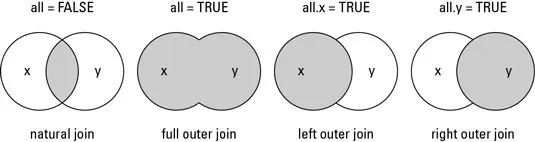

In [30]:
head(peliculas2)

ID,Nombre,Agno,Categoria
<chr>,<chr>,<dbl>,<chr>
tt0000009,Miss Jerry,1894,Romance
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
tt0000502,Bohemios,1905,NA
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography"
tt0000591,The Prodigal Son,1907,Drama
tt0000615,Robbery Under Arms,1907,Drama


In [31]:
head(ratings)

tconst,averageRating,numVotes
<chr>,<dbl>,<dbl>
tt0000001,5.7,1976
tt0000002,5.8,264
tt0000003,6.5,1824
tt0000004,5.6,178
tt0000005,6.2,2617
tt0000006,5.1,182


Hacemos el join a traves de el "ID" (para la tabla peliculas2) y a traves de "tconst" para la tabla ratings. 

inner_join nos deja con toda la lista de peliculas a las cuales puede asociarle un rating, es decir el ID se encuentra tanto en la tabla peliculas2 como en la tabla ratings.

In [32]:
inner_join(peliculas2, ratings, c("ID"="tconst"))

ID,Nombre,Agno,Categoria,averageRating,numVotes
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
tt0000009,Miss Jerry,1894,Romance,5.3,206
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",5.3,472
tt0000502,Bohemios,1905,NA,4.1,15
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,829
tt0000591,The Prodigal Son,1907,Drama,4.4,20
tt0000615,Robbery Under Arms,1907,Drama,4.3,24
tt0000630,Hamlet,1908,Drama,2.8,26
tt0000675,Don Quijote,1908,Drama,4.2,20
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy",5.1,68


Left join nos deja con toda la lista de peliculas **aunque** no encuentre el rating

In [41]:
left_join(peliculas2, ratings, c("ID"="tconst"))

ID,Nombre,Agno,Categoria,averageRating,numVotes
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
tt0000009,Miss Jerry,1894,Romance,5.3,206
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",5.3,472
tt0000502,Bohemios,1905,NA,4.1,15
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,829
tt0000591,The Prodigal Son,1907,Drama,4.4,20
tt0000615,Robbery Under Arms,1907,Drama,4.3,24
tt0000630,Hamlet,1908,Drama,2.8,26
tt0000675,Don Quijote,1908,Drama,4.2,20
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy",5.1,68


De modo reciproco right_join nos deja con toda la lista de ratings **aunque** no encuentre la pelicula

In [ ]:
right_join(peliculas2, ratings, c("ID"="tconst"))

Finalmente, full_join nos deja la lista de ratings y peliculas, incluyendo las peliculas a las cuales no les encontro el rating y tambien los ratings a los cuales no les encontro la informacion de la pelicula.

In [40]:
full_join(peliculas2, ratings, c("ID"="tconst"))

ID,Nombre,Agno,Categoria,averageRating,numVotes
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
tt0000009,Miss Jerry,1894,Romance,5.3,206
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",5.3,472
tt0000502,Bohemios,1905,NA,4.1,15
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,829
tt0000591,The Prodigal Son,1907,Drama,4.4,20
tt0000615,Robbery Under Arms,1907,Drama,4.3,24
tt0000630,Hamlet,1908,Drama,2.8,26
tt0000675,Don Quijote,1908,Drama,4.2,20
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy",5.1,68


## Reasignamos la tabla peliculas 2 para que ahora contenga los ratings


In [33]:
peliculas2<-inner_join(peliculas2, ratings, c("ID"="tconst"))
head(peliculas2)

Tambien eliminamos la columna numVotes y renombramos la columna averageRating

In [34]:
peliculas2 <- peliculas2 %>% select(-c("numVotes")) %>% rename(c("Calificacion"="averageRating"))
head(peliculas2)

# Interseccion y Diferencia

Supongamos que queremos una lista de peliculas que sean de comedia y romanticas, esto seria una interseccion.

Si queremos la lista de peliculas que sean de comedia pero no de romance, seria diferencia. 

Busquemos las peliculas de comedia y de romance mediante la funcion grepl (explicada en el taller)

In [41]:
peliculas_romance <- peliculas2 %>%
                        filter(grepl("romance", Categoria, ignore.case = TRUE))
head(peliculas_romance)

ID,Nombre,Agno,Categoria,Calificacion
<chr>,<chr>,<dbl>,<chr>,<dbl>
tt0000009,Miss Jerry,1894,Romance,5.3
tt0001175,Camille,1912,"Drama,Romance",5.2
tt0001475,Amor fatal,1911,"Drama,Romance",7.7
tt0002026,Anny - Story of a Prostitute,1912,"Drama,Romance",4.5
tt0002423,Passion,1919,"Biography,Drama,Romance",6.6
tt0002555,The Last Bohemian,1913,"Drama,Romance",4.6


In [42]:
peliculas_comedia <- peliculas2 %>%
                        filter(grepl("comedy", Categoria, ignore.case = TRUE))
head(peliculas_comedia)

ID,Nombre,Agno,Categoria,Calificacion
<chr>,<chr>,<dbl>,<chr>,<dbl>
tt0001028,Salome Mad,1909,Comedy,4.1
tt0002474,Saty delaji cloveka,1913,Comedy,6.4
tt0002996,My Husband's Getting Married,1913,Comedy,3.6
tt0003015,Die Insel der Seligen,1913,"Comedy,Fantasy",4.7
tt0003565,Where Is Coletti?,1913,"Comedy,Crime",6.1
tt0003598,The Adventures of Andy Clark,1914,"Adventure,Comedy",4.6


# Interseccion

Supongamos que queremos las peliculas que son de romance y comedia al mismo tiempo.

In [45]:
intersect(peliculas_comedia, peliculas_romance)

ID,Nombre,Agno,Categoria,Calificacion
<chr>,<chr>,<dbl>,<chr>,<dbl>
tt0004825,The Wishing Ring: An Idyll of Old England,1914,"Comedy,Drama,Romance",6.4
tt0005179,David Harum,1915,"Comedy,Drama,Romance",5.6
tt0005214,Double Trouble,1915,"Comedy,Romance",5.2
tt0006327,Young Romance,1915,"Comedy,Romance",5.8
tt0006359,The Americano,1916,"Adventure,Comedy,Romance",6.2
tt0006826,Hoodoo Ann,1916,"Comedy,Drama,Romance",5.9
tt0007031,Manhattan Madness,1916,"Action,Comedy,Romance",6.0
tt0007047,The Matrimaniac,1916,"Comedy,Romance",6.4
tt0007118,Nearly a King,1916,"Comedy,Romance",7.9


# Diferencia
Supongamos que queremos las peliculas que son de comedia pero no romanticas 

In [46]:
setdiff(peliculas_comedia, peliculas_romance)

ID,Nombre,Agno,Categoria,Calificacion
<chr>,<chr>,<dbl>,<chr>,<dbl>
tt0001028,Salome Mad,1909,Comedy,4.1
tt0002474,Saty delaji cloveka,1913,Comedy,6.4
tt0002996,My Husband's Getting Married,1913,Comedy,3.6
tt0003015,Die Insel der Seligen,1913,"Comedy,Fantasy",4.7
tt0003565,Where Is Coletti?,1913,"Comedy,Crime",6.1
tt0003598,The Adventures of Andy Clark,1914,"Adventure,Comedy",4.6
tt0003698,Brewster's Millions,1914,Comedy,6.5
tt0003884,Engelein,1914,Comedy,6.6
tt0003973,A Florida Enchantment,1914,Comedy,5.8


## Semi_join

Semi_join es parecido a la interseccion, sin embargo se hace mediante una llave. En otras palabras:
 
     semi_join(dataframe_A,dataframe_B,by="key")
     
Se queda con las filas de dataframe_A, cuyos valores en la columna "key" se encuentren tambien en el dataframe_B.

Por ejemplo, si queremos las peliculas de comedia que al mismo tiempo sean de romance:


In [47]:
semi_join(peliculas_comedia, peliculas_romance, by= "ID")

ID,Nombre,Agno,Categoria,Calificacion
<chr>,<chr>,<dbl>,<chr>,<dbl>
tt0004825,The Wishing Ring: An Idyll of Old England,1914,"Comedy,Drama,Romance",6.4
tt0005179,David Harum,1915,"Comedy,Drama,Romance",5.6
tt0005214,Double Trouble,1915,"Comedy,Romance",5.2
tt0006327,Young Romance,1915,"Comedy,Romance",5.8
tt0006359,The Americano,1916,"Adventure,Comedy,Romance",6.2
tt0006826,Hoodoo Ann,1916,"Comedy,Drama,Romance",5.9
tt0007031,Manhattan Madness,1916,"Action,Comedy,Romance",6.0
tt0007047,The Matrimaniac,1916,"Comedy,Romance",6.4
tt0007118,Nearly a King,1916,"Comedy,Romance",7.9


## Anti_join

Anti_join es parecido a la diferencia de conjuntos, sin embargo se hace mediante una llave. En otras palabras:
 
     anti_join(dataframe_A,dataframe_B,by="key")
     
Se queda con las filas de dataframe_A, cuyos valores en la columna "key" **NO** se encuentren en el dataframe_B.

Por ejemplo, si queremos las peliculas de comedia que **no** sean de romance:


In [48]:
anti_join(peliculas_comedia, peliculas_romance, by= "ID")

ID,Nombre,Agno,Categoria,Calificacion
<chr>,<chr>,<dbl>,<chr>,<dbl>
tt0001028,Salome Mad,1909,Comedy,4.1
tt0002474,Saty delaji cloveka,1913,Comedy,6.4
tt0002996,My Husband's Getting Married,1913,Comedy,3.6
tt0003015,Die Insel der Seligen,1913,"Comedy,Fantasy",4.7
tt0003565,Where Is Coletti?,1913,"Comedy,Crime",6.1
tt0003598,The Adventures of Andy Clark,1914,"Adventure,Comedy",4.6
tt0003698,Brewster's Millions,1914,Comedy,6.5
tt0003884,Engelein,1914,Comedy,6.6
tt0003973,A Florida Enchantment,1914,Comedy,5.8
